In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv('iris.data.txt')
df.columns=('sepal_length_in_cm','sepal_width_in_cm','petal_length_in_cm','petal_width_in_cm','class')

In [3]:
iris_data=df.dropna()

In [4]:
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
iris_data.describe()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_data['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: class, dtype: int64

sepal_length_in_cm       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal_width_in_cm     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal_length_in_cm          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal_width_in_cm        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

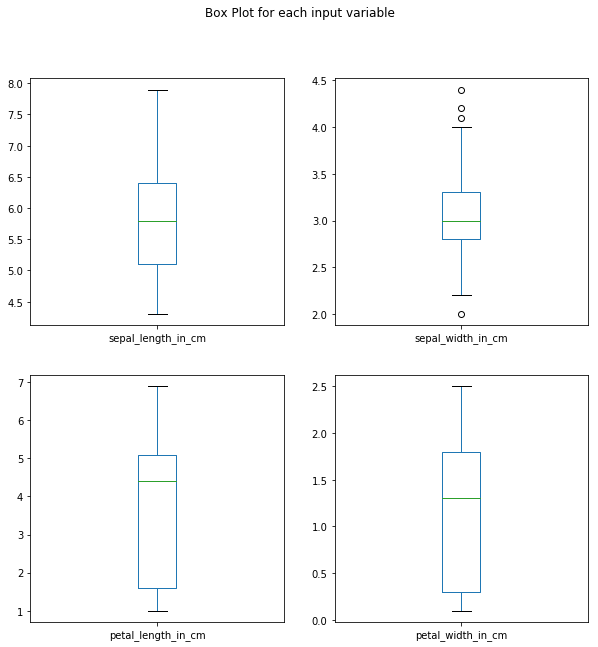

In [7]:
iris_data.plot(kind='box',figsize=(10,10),subplots=True, layout=(2,2), sharex=False, sharey=False, 
                                        title='Box Plot for each input variable')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E83E1A7668>,
      dtype=object)

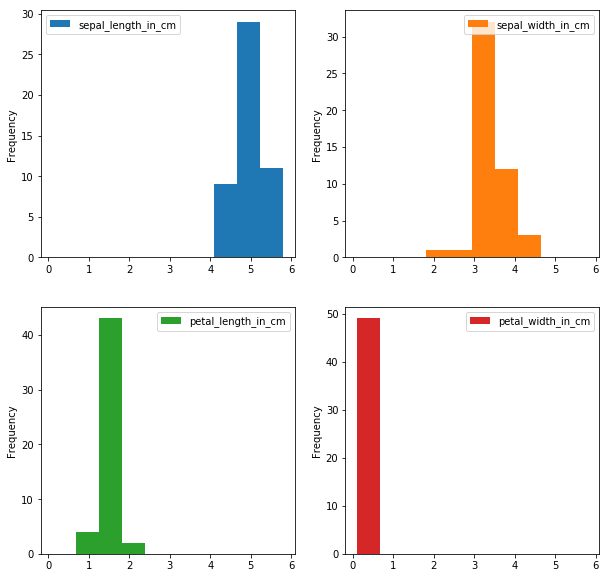

In [8]:
iris_data.loc[iris_data['class']=='Iris-setosa'].plot(kind='hist',subplots=True, layout=(2,2), sharex=False, sharey=False,figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E83E6E75C0>,
      dtype=object)

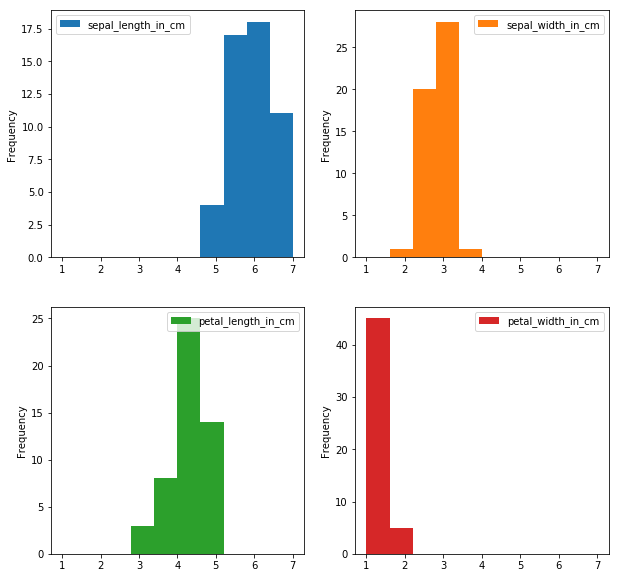

In [9]:
iris_data.loc[iris_data['class']=='Iris-versicolor'].plot(kind='hist',subplots=True, layout=(2,2), sharex=False, sharey=False,figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E83FA7CF98>,
      dtype=object)

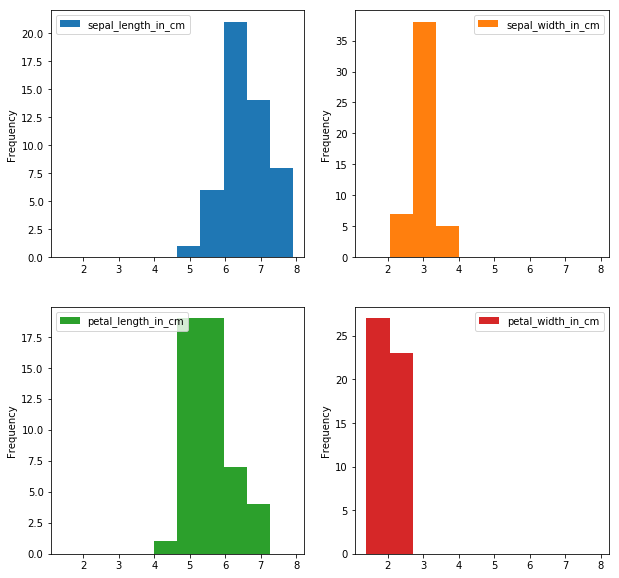

In [10]:
iris_data.loc[iris_data['class']=='Iris-virginica'].plot(kind='hist',subplots=True, layout=(2,2), sharex=False, sharey=False,figsize=(10,10))


C:\Users\AKSHATA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


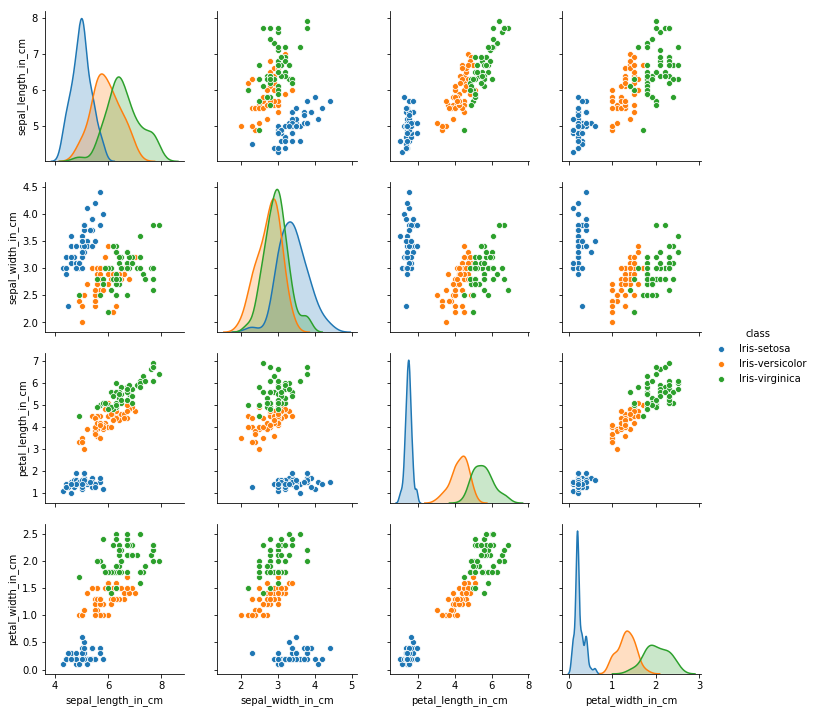

In [21]:
sb.pairplot(iris_data.dropna(), hue='class')

In [29]:
X= iris_data.iloc[:,:-1].values
y=iris_data['class']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)
scaler=MinMaxScaler()
X_tain=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

133     Iris-virginica
109     Iris-virginica
59     Iris-versicolor
80     Iris-versicolor
7          Iris-setosa
104     Iris-virginica
140     Iris-virginica
95     Iris-versicolor
118     Iris-virginica
84     Iris-versicolor
33         Iris-setosa
44         Iris-setosa
54     Iris-versicolor
24         Iris-setosa
37         Iris-setosa
132     Iris-virginica
111     Iris-virginica
73     Iris-versicolor
16         Iris-setosa
45         Iris-setosa
40         Iris-setosa
8          Iris-setosa
85     Iris-versicolor
22         Iris-setosa
62     Iris-versicolor
94     Iris-versicolor
90     Iris-versicolor
26         Iris-setosa
43         Iris-setosa
134     Iris-virginica
Name: class, dtype: object

In [30]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set:',(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set:',(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.957983193277311
Accuracy of Logistic regression classifier on test set: 0.8333333333333334


In [31]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier().fit(X_train,y_train)
print('Accuracy of decision tree classifier on training set:',(classifier.score(X_train,y_train)))
print('Accuracy of decison tree classifier on testing set:',(classifier.score(X_test,y_test)))

Accuracy of decision tree classifier on training set: 1.0
Accuracy of decison tree classifier on testing set: 0.4


In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set:',(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set:',(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.9663865546218487
Accuracy of K-NN classifier on test set: 0.4
